In [1]:
"""
清洗数据后------数据分析---age 年龄 特征分析
"""
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns

pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

mp.rcParams['font.sans-serif'] = ['SimHei']
mp.rcParams['axes.unicode_minus'] = False
"""
参考

      Pregnancies     Glucose  BloodPressure        BMI  DiabetesPedigreeFunction        Age  Outcome
非糖尿病     3.298000  110.643863      71.114000  30.960000                  0.429734  31.190000      0.0
糖尿病      4.865672  142.319549      75.988806  35.409701                  0.550500  37.067164      1.0
"""

# ---------------------------------- get data -------------------------------
pima_data = pd.read_csv("../data/cleaned_pima_data.csv")

# ------------------------age-特征值分析------------------------------------

# ------------计算数据------------
statistics = pima_data["Age"].describe()

statistics['range'] = statistics['max'] - statistics['min']  # 极差
statistics['var'] = statistics['std'] / statistics['mean']  # 方差
statistics['dis'] = statistics['75%'] - statistics['25%']  # 四分距
print(statistics)
# 年龄最少是21,最大是81,平均33.24岁


count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
range     60.000000
var        0.353788
dis       17.000000
Name: Age, dtype: float64


In [2]:
# -------------------------查看age的值小于25,但得糖尿病的情况-------------------------
print("--------查看age的值小于25,但得糖尿病的情况-------")
check = pima_data.loc[(pima_data["Age"] < 25) & (pima_data["Outcome"] == 1)]
print("总共有%d人" % check.shape[0])
# 总共有31人
check.head(8)
# 她们的bmi值都偏高,葡萄糖值也偏高

--------查看age的值小于25,但得糖尿病的情况-------
总共有31人


,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
109,0,95.0,85,37.4,0.247,24,1
110,3,171.0,72,33.3,0.199,24,1
124,0,113.0,76,33.3,0.278,23,1
197,3,107.0,62,22.9,0.678,23,1
213,0,140.0,65,42.6,0.431,24,1
220,0,177.0,60,34.6,1.072,21,1
227,3,162.0,52,37.2,0.652,24,1
230,4,142.0,86,44.0,0.645,22,1


In [3]:
print(check.mean(axis=0))
""" 可见年轻的人士得糖尿病,因为是葡萄糖值偏高,肥胖的原因造成的
Pregnancies                   1.580645  糖尿病该特征均值4.86,非糖均值:3.29
Glucose                     141.064516  糖尿病该特征均值140,非糖均值:110
BloodPressure                72.258065  糖尿病该特征均值75,非糖均值:71
BMI                          36.422581  糖尿病该特征均值35,非糖均值:30
DiabetesPedigreeFunction      0.549516  糖尿病该特征均值0.55,非糖均值:0.42
Age                          22.580645  糖尿病该特征均值37,非糖均值:31
Outcome                       1.000000
"""


Pregnancies                   1.580645
Glucose                     141.064516
BloodPressure                72.258065
BMI                          36.422581
DiabetesPedigreeFunction      0.549516
Age                          22.580645
Outcome                       1.000000
dtype: float64


' 可见年轻的人士得糖尿病,因为是葡萄糖值偏高,肥胖的原因造成的\nPregnancies                   1.580645  糖尿病该特征均值4.86,非糖均值:3.29\nGlucose                     141.064516  糖尿病该特征均值140,非糖均值:110\nBloodPressure                72.258065  糖尿病该特征均值75,非糖均值:71\nBMI                          36.422581  糖尿病该特征均值35,非糖均值:30\nDiabetesPedigreeFunction      0.549516  糖尿病该特征均值0.55,非糖均值:0.42\nAge                          22.580645  糖尿病该特征均值37,非糖均值:31\nOutcome                       1.000000\n'

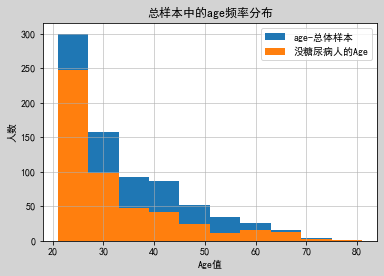

In [4]:
# ------------------------------------数据可视化展示------------------------------
# -------------draw 1 --------------
mp.figure("总样本中的age频率分布", facecolor="lightgray")
mp.title("总样本中的age频率分布")
pima_data["Age"].hist(label="age-总体样本")
pima_data.loc[pima_data["Outcome"] == 0, "Age"].hist(label="没糖尿病人的Age")
mp.xlabel("Age值")
mp.ylabel("人数")
mp.grid()
mp.legend()
mp.grid(":", alpha=0.7)
mp.show()

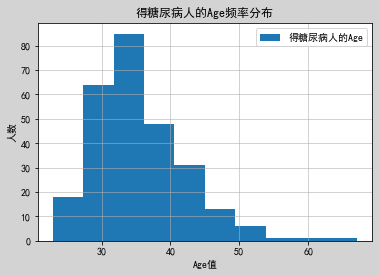

In [5]:
# -------------draw 2 --------------
mp.figure("得糖尿病人的Age频率分布", facecolor="lightgray")
mp.title("得糖尿病人的Age频率分布")
pima_data.loc[pima_data["Outcome"] == 1, "BMI"].hist(label="得糖尿病人的Age")
mp.xlabel("Age值")
mp.ylabel("人数")
mp.grid()
mp.legend()
mp.grid(":", alpha=0.7)
mp.show()

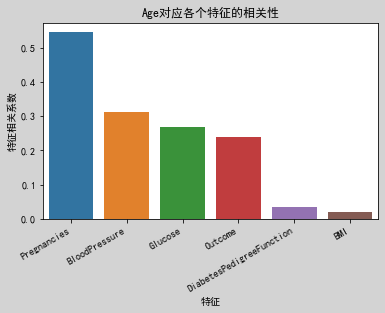

In [6]:
# -------------draw 3 --------------
# draw heatmap  计算数据：　皮尔逊积矩相关系数　　　各个特征的相关系数
cols = ["Pregnancies", "Glucose", "BloodPressure", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df_corr = pima_data[cols].corr()

#   draw bar  Age对应各个特征的相关性
mp.figure("Age对应各个特征的相关性", facecolor="lightgray")
mp.title("Age对应各个特征的相关性")
df_barplot = df_corr["Age"].sort_values()[::-1].drop("Age")
sns.barplot(df_barplot.index, df_barplot)
mp.gcf().autofmt_xdate()
mp.xlabel("特征")
mp.ylabel("特征相关系数")
mp.show()

